In [1]:
#step two of midterm
import pyLDAvis
import pyLDAvis.sklearn
import numpy as np
pyLDAvis.enable_notebook()

#import dataset
from sklearn.datasets import fetch_20newsgroups
#import functions to analyze the __ and the relative weighted term freq of words in a doc (TFIDF)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#import LDA stuff
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
#load variables from prefin notebook
%store -r newsgroup

In [3]:
#newsgroup

In [4]:
#the term frequency vectorizer returns an M(document number in rows) BY N(count of every possible word in col) matrix of term frequency
#min and max df (doc freq) are set to select thresholds of which words to include in the tf matrix
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 10 means "ignore terms that appear in fewer than 10 documents".
# this gets rid of words like "the", "and" (thanks to max_df) 
# also removes words like "supercalifragalisticexpialidocious" which may only appear in one or two articles and thus is not important to consider
# searches for alphanumeric of three or more letters


#start with vectorizer for larger vocabulary 
countVec1 = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)


#now do vectorizer for smaller vocabulary 
countVec2 = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.1, 
                                min_df = 50)

#bow matrices
bow_large = countVec1.fit_transform(newsgroup.data)
bow_small = countVec2.fit_transform(newsgroup.data)

#tfidf vectorizers
tfidf____large = TfidfVectorizer(**countVec1.get_params())
tfidf____small = TfidfVectorizer(**countVec2.get_params())

#tfidf matrices
tfidf_large = tfidf____large.fit_transform(newsgroup.data)
tfidf_small = tfidf____small.fit_transform(newsgroup.data)






#returns (11314, 9144) so 11314 rows (docs) and 9144 words (cols)         fitting the max_df and min_df constraints we gave
# note that the term frequency matrix is extremely sparse, as only few docs have certain words

#print(tf_vectorizer.get_feature_names())

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1577: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [5]:
print('The shape (docs,words) of the large BOW matrix is ', bow_large.shape)
print('The shape (docs,words) of the small BOW matrix is ', bow_small.shape)
print('The shape (docs,words) of the large tfidf matrix is ', tfidf_large.shape)
print('The shape (docs,words) of the small tfidf matrix is ', tfidf_small.shape)

The shape (docs,words) of the large BOW matrix is  (18846, 12725)
The shape (docs,words) of the small BOW matrix is  (18846, 3851)
The shape (docs,words) of the large tfidf matrix is  (18846, 12725)
The shape (docs,words) of the small tfidf matrix is  (18846, 3851)


In [6]:
print('the length of the larger vocabulary is ', len(countVec1.get_feature_names()),'\n')

#print all words in larger vocab
print(countVec1.get_feature_names())


the length of the larger vocabulary is  12725 

['aaa', 'aaron', 'abandon', 'abandoned', 'abc', 'abdominal', 'abiding', 'abilities', 'ability', 'able', 'aboard', 'abolish', 'abolished', 'abomination', 'abominations', 'abort', 'abortion', 'abound', 'abraham', 'abroad', 'abruptly', 'abs', 'absence', 'absent', 'absolute', 'absolutely', 'absolutes', 'absorb', 'absorbed', 'absorption', 'abstract', 'abstracts', 'absurd', 'absurdity', 'abu', 'abundant', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'academia', 'academic', 'academics', 'academy', 'acc', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accelerator', 'accelerators', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessing', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'accommodate', 'accomodate', 'accompanied', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishments', 'accord',

In [7]:

vocab1 = countVec1.get_feature_names()
%store vocab1

vocab2 = countVec2.get_feature_names()
%store vocab2

Stored 'vocab1' (list)
Stored 'vocab2' (list)


In [8]:
print('the length of the smaller vocabulary is ', len(countVec2.get_feature_names()),'\n')

#print all words in smaller vocab
print(countVec2.get_feature_names())

the length of the smaller vocabulary is  3851 

['abc', 'abiding', 'ability', 'able', 'absence', 'absolute', 'absolutely', 'abstract', 'absurd', 'abuse', 'accelerator', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accident', 'accomplish', 'according', 'account', 'accounts', 'accuracy', 'accurate', 'achieve', 'achieved', 'acid', 'act', 'acting', 'action', 'actions', 'active', 'actively', 'activities', 'activity', 'acts', 'actual', 'actually', 'adam', 'adams', 'adapter', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'addresses', 'addressing', 'adds', 'adequate', 'adjust', 'administration', 'admit', 'admitted', 'adobe', 'ads', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'advantages', 'advertising', 'advice', 'affairs', 'affect', 'affected', 'afford', 'afraid', 'afternoon', 'age', 'agencies', 'agency', 'agenda', 'agent', 'agents', 'ago', 'agree', 'agreed', 'agreement', 'ahead', 'aid', 'aids', 'aim', 'aimed', 'ain', 'air'

In [9]:
#import for debugging to obtain attributes of objects
from pprint import pprint

#set the number of distince topics we want our LDA classifier to extract
#the true number of topics given is 20 but we reduced it to the 6 overarching topics

#set the number of distince topics we want our LDA classifier to extract
num_topics = 6

#large vocab
#now, set up LDA to obtain a matrix with TxW (topics(6)) by (words) with the estimated probabilities 
lda_large = LatentDirichletAllocation(n_components=num_topics, random_state=0, max_iter=50, verbose=1)

#fit the lda model to our document term matrix (TF-IDF matrix) of large vocab
lda_large.fit(tfidf_large)


#small vocab
#now, set up LDA to obtain a matrix with TxW (topics(6)) by (words) with the estimated probabilities 
lda_small = LatentDirichletAllocation(n_components=num_topics, random_state=0, max_iter=50, verbose=1)

#fit the lda model to our document term matrix (TF-IDF matrix) of large vocab
lda_small.fit(tfidf_small)




iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=6, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [10]:
#pprint(vars(lda_small))
#should give the number of words and it does!
len(lda_small.components_[5])

3851

In [11]:
#pprint(vars(lda_small))

In [12]:
#visualization number one is pyldaVis

#large vocab first
#Give PyLDAVis the lda object, term freq matrix, and alphabetical list of words we consider
pyLDA_large = pyLDAvis.sklearn.prepare(lda_large, tfidf_large, countVec1)


#small vocab now
#Give PyLDAVis the lda object, term freq matrix, and alphabetical list of words we consider
pyLDA_small = pyLDAvis.sklearn.prepare(lda_small, tfidf_small, countVec2)





/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [13]:
#display results for large vocab first
pyLDAvis.display(pyLDA_large)

In [14]:
#display results for small vocab now
pyLDAvis.display(pyLDA_small)

In [15]:
#visualization number two is a combined word cloud

In [16]:
#write helper function to get top words for each category
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [17]:
#display top words for larger vocab
n_top_words = 20
print("\nTopics in LDA model for vocab 1:")
tf_feature_names = countVec1.get_feature_names()
print_top_words(lda_large, tf_feature_names, n_top_words)


Topics in LDA model for vocab 1:
Topic #0: thanks drive like use know does mail just card new used don need software edu computer good email work chip
Topic #1: windows file thanks window files program dos ftp use using does server version know help problem application motif graphics driver
Topic #2: subscribe feustel shafer dryden insisting comics ames balls yankee garrett upenn chop projector keith rosicrucian wolverine hulk netcom sas ditto
Topic #3: game team games year hockey baseball players season play league player win teams think hit nhl espn fans good stats
Topic #4: car bike cars engine armenian miles armenians dod ride turkish oil bmw rear honda ford riding road turkey bikes motorcycle
Topic #5: people don god just think like know say time did right believe does way said good government make really things



In [18]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [19]:
#store text for large vocab --> combine all words into one list for word cloud to use
text1 = ("just like don think car know people god good time did said right really new way bike day want say game baseball team pitt gordon bikes year runs hit banks games braves stats players skepticism intellect pitcher geb shameful pitching thanks windows use does know mail drive card file like edu software using program need problem dos help email looking game team games hockey armenian armenians season nhl play turkish espn players year chicago rangers teams pens detroit toronto leafs isa vlb stealth nanao mint viper turkey cheat comics interlaced orchid carl winmarks christmas leds leftover sunroof winbench truelove cirrus people don think government just say believe like space know does time make god law way good point true use")

In [20]:
#display top words for smaller vocab
n_top_words = 20
print("\nTopics in LDA model for vocab 1:")
tf_feature_names = countVec2.get_feature_names()
print_top_words(lda_small, tf_feature_names, n_top_words)


Topics in LDA model for vocab 1:
Topic #0: game car team year games bike hockey season players got baseball play really better did engine going years cars hit
Topic #1: mail edu thanks sale email space interested com list address price send offer information looking shipping computer info condition nasa
Topic #2: government israel gun law did fbi state said rights war jews police clinton guns children going koresh public israeli armenian
Topic #3: windows file program thanks files dos window using ftp problem version help graphics server code run image running application display
Topic #4: god jesus believe christian bible life point church said did things read really true question religion christians christ fact faith
Topic #5: drive card chip scsi monitor key disk apple mac board video bus drives bit work clipper encryption modem hard thanks



In [21]:
#store text for large vocab --> combine all words into one list for word cloud to use
text2 = ('god did said believe government point really things question read going years fact sure state true law world course life thanx radar lock detector toyota yeah label adams mercury shadow diagnosed sub douglas inch sells chronic thats contract distribution rotation thanks windows card mail drive file software program edu using dos problem help email mac computer files advance graphics looking game games team year hockey players season baseball play league player win teams hit nhl fans toronto stats espn rangers key clipper encryption chip keys algorithm escrow msg phone crypto secure phones security encrypted dog chips scheme cellular secret customer car bike cars price power buy sell engine sale condition oil miles dod speed got battery old ride low stuff')

In [22]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


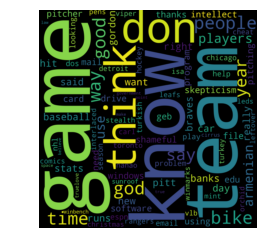

In [23]:
# Create the wordcloud object for large vocab
wordcloud1 = WordCloud(width=1600, height=1600, margin=0).generate(text1)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

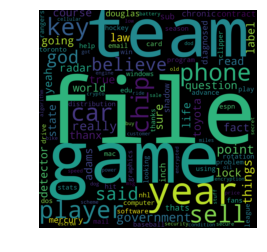

In [24]:
#Create the wordcloud object for large vocab
wordcloud2 = WordCloud(width=1600, height=1600, margin=0).generate(text2)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [25]:
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool
from sklearn.manifold import TSNE

In [26]:
#Visualization 3 uses tsne

In [27]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

n_topics = 6 # number of topics
n_iter = 500 # number of iterations


#start with vectorizer for larger vocabulary 
cvectorizer1 = CountVectorizer(strip_accents = 'unicode',
                            stop_words = 'english',
                            lowercase = True,
                            token_pattern = r'\b[a-zA-Z]{3,}\b',
                            max_df = 0.5, 
                            min_df = 10)
#next with vectorizer for smaller vocabulary 
cvectorizer2 = CountVectorizer(strip_accents = 'unicode',
                            stop_words = 'english',
                            lowercase = True,
                            token_pattern = r'\b[a-zA-Z]{3,}\b',
                            max_df = 0.1, 
                            min_df = 50)

cvz1 = cvectorizer1.fit_transform(newsgroup.data)
cvz2 = cvectorizer2.fit_transform(newsgroup.data)

# train an LDA model on large the small vocabs
lda_model_1 = lda.LDA(n_topics=n_topics, n_iter=n_iter)
lda_model_2 = lda.LDA(n_topics=n_topics, n_iter=n_iter)

Vocab1_topics = lda_model_1.fit_transform(cvz1)
Vocab2_topics = lda_model_2.fit_transform(cvz2)

######remove uncertain words, only a few
threshold = 0.5
_idx = np.amax(Vocab1_topics, axis=1) > threshold  # idx of doc that above the threshold
Vocab1_topics = Vocab1_topics[_idx]

_idx = np.amax(Vocab2_topics, axis=1) > threshold  # idx of doc that above the threshold
Vocab2_topics = Vocab2_topics[_idx]
######



INFO:lda:n_documents: 18846
INFO:lda:vocab_size: 12725
INFO:lda:n_words: 1384535
INFO:lda:n_topics: 6
INFO:lda:n_iter: 500
/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -14695922
INFO:lda:<10> log likelihood: -12421595
INFO:lda:<20> log likelihood: -11967755
INFO:lda:<30> log likelihood: -11856708
INFO:lda:<40> log likelihood: -11810464
INFO:lda:<50> log likelihood: -11786341
INFO:lda:<60> log likelihood: -11770631
INFO:lda:<70> log likelihood: -11759289
INFO:lda:<80> log likelihood: -11752883
INFO:lda:<90> log likelihood: -11746278
INFO:lda:<100> log likelihood: -11740336
INFO:lda:<110> log likelihood: -11739640
INFO:lda:<120> log likelihood: -11738112
INFO:lda:<130> log likelihood: -11736460
INFO:lda:<140> log likel

In [28]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model_1 = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
#tsne_model_2 = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# fit to vocabs
tsne_lda_1 = tsne_model_1.fit_transform(Vocab1_topics)
#tsne_lda_2 = tsne_model_2.fit_transform(Vocab2_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15651 samples in 0.037s...
[t-SNE] Computed neighbors for 15651 samples in 0.734s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15651
[t-SNE] Computed conditional probabilities for sample 2000 / 15651
[t-SNE] Computed conditional probabilities for sample 3000 / 15651
[t-SNE] Computed conditional probabilities for sample 4000 / 15651
[t-SNE] Computed conditional probabilities for sample 5000 / 15651
[t-SNE] Computed conditional probabilities for sample 6000 / 15651
[t-SNE] Computed conditional probabilities for sample 7000 / 15651
[t-SNE] Computed conditional probabilities for sample 8000 / 15651
[t-SNE] Computed conditional probabilities for sample 9000 / 15651
[t-SNE] Computed conditional probabilities for sample 10000 / 15651
[t-SNE] Computed conditional probabilities for sample 11000 / 15651
[t-SNE] Computed conditional probabilities for sample 12000 / 15651
[t-SNE] Computed conditional probabilities for sam

In [29]:
# 6 colors
colormap = np.array([
    "#f44b42", "#f4e241", "#a3f441", "#41f4be", "#4182f4",
    "#a341f4"])

In [30]:
#get true categories based on most likely lda assigned
_lda_keys_1 = []
for i in range(Vocab1_topics.shape[0]):
  _lda_keys_1 +=  Vocab1_topics[i].argmax(),

# _lda_keys_2 = []
# for i in range(Vocab2_topics.shape[0]):
#   _lda_keys_2 +=  Vocab2_topics[i].argmax(),

In [31]:
from bokeh.models import ColumnDataSource 
#plot first vocab
title = '20 newsgroups LDA vocab 1'
num_example = len(Vocab1_topics)

plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)


######
#######
#####

#data = {'content': news[:num_example], 'topic_key': _lda_keys[:num_example], 'x':tsne_lda[:, 0], 'y':tsne_lda[:, 1], 'colorMap':colormap[_lda_keys][:num_example]}
data = {'topic_key': _lda_keys_1[:num_example], 'x':tsne_lda_1[:, 0], 'y':tsne_lda_1[:, 1], 'colorMap':colormap[_lda_keys_1][:num_example]}

source = ColumnDataSource(data)




plot_lda.scatter(x='x', y='y',
                 color='colorMap',
                 source=source)


bokeh.models.renderers.GlyphRenderer(
    id='2b99c71a-032c-4715-818c-816aecb33ac4',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='ba6ce9b8-7493-49fd-bd1c-eca2ce243bac',
        callback=None,
        data={'x': {'__ndarray__': 'hrMOwg9tkUJXIUBC53ThQRAeOL+sK4FBtlsIwh9npMEVz8fBNNoFwRUSGcE5zP7BdUCOwa1aEkLMpwRB7uIswiwyKEFJEI1B0XLNQdVP1EEeqx5Chx4rwh9U9b8wLULBOmcCQgV5vUHPAsPBpsEBQJZAjsCt7iBAjceOQegAN8JN0DlCGO+HQl6pD0Ld3wtCp8cfQsBAjMJeZ+RB78Z/Qh1YesEf+ME/tmzVQW+r6UA2Gx3Cw8rKwQd2n8EljIRBBqmoQOrfx0FqfY1B1FyiweYzPUIrAVpA7yDfQCz0PsE9U4nB0FK3wXN+CMKTSYpA1MctQgCPGEKezBzCbw1YwTeOvUH1FJRB4fTiQSLlqEBEpkRCslcjQQHHf0IPA8vBKzhpwlukkEIw5NvB7TDyQfrQ8UGw/ZRB5LVNwl0R4L5bLAZBp7pEQLhY3EEDy/TBGYNbwffuh0LFEA9BWNkMQTdnE0KfgUdCttwPwFfi1UF6v+rB8MPgwUKP00FpUptBFatLwitdLkLEuIdCWU9EQQmwskGrBZJA5MW1wWYK6z8ZjzBBSztnQgJiwMC+D47Bk6XlwZel6EF8j0RCHcUrwoZO/UEeIKpBdlMXwurBLkIbXtzAK+drQYED7ME10RfCYWd4QjVsukEhPuTBdTyLQWh0f8GpsiZC5z31QUw43sEv4OdBMFAMwud+NkBuaj9CJoUVQpvhj8E1oFJBTki0wW9jvUDkNsLB/n5OQhLlKcE0TM5B6KUDQi1qLMJmoxlBYgmDQuQSIcLbtLlBe0GewNygxUE+kvJB/ZkfwjrEsEAf8SXC9ijdwTM8s0HZUKXB4xAgwsf4tsEwHalB8FdowitC3UCuERnB/C2EwTvfn0Fv0NpB3B5QwPcwmkFe197AWZVYQTpO5sC3x/fBy328QZoai0HViJlBhA4Qwu9FBcLEP4pAzEsVwp8YDD+ixehAKVlYQjW+jUHHSAnBy6RAQq2FVUL9yk7CcaJAQui91kH2z4TBKCpOwsaJWUH0nuTBP4Ezwg2r2sG6YyBBOq7QwS9sh0DiSEpCy2YyQtYKt0GhAOTBc3Iuwn2R3kH2foVAl7VoQcMHNELwaQlCLUPdQPo5sMCgKW3BsY+FQZQ3H0I1GepBe0GxQNAUzEHzsDVAltg7QjJMVUEqskvC3G5AQRZ6IsIjBRnBYaURQjqhNcLFYV7CJNcHwrBgQ0ImMhLA6n+8wGcIG8G0rP3BnywGQSeaEML130tBZrA9wX0el8FODoHA2OScQiTJ4UFFaUfC+3R8QXuLSkL/7pZB2PSXQmOZMUDpfWPAwvXmwZ0UmT8+IudBfH42wXprO0H7dadAoUPMPwzBfsHiOVvBOLsiwbrfpkHJZJjBZdDEQfCXNEEq7b1BfFw/wUJdSML9IyNCO1xSwsfpVUDRf1/BCuXBwKa8PEEf4JrBi3M+Qi1qCsKXDINBCN1Mwk36iEDQkxNC+7XTQYWoJ0GAUptBx9ScwOPYj8FuqTTBAzEmwtjrB0ICH0bC+QueQp6jT8IRDSLBevUewLzdxsFGTajBu9cUwjPHXMGl5HdBEt+3QKH5e0G3gkbCKOCqweoarsEWt67BnB4sQsBXkUF7I/TBf8GDwSyCxcFFQjTCz7T8QaGiOUL6AllB5zYtwaUAjMJLMnfCsT2IQSjCqMFy3EDCkUyXwZHGf0KkJkXCjXfPwYO//0EWFMvBhL9EQLiYP0CSgh7CxnTVQIL+ycHoVQxCBKDiwSWkF0I0WX/AeHw4wnZ6kkJ8tCfBfq/LQSoDtsEby34/+MHpwcTSXEHUmQtClKoXQhl5DUKNsRXChgT3QBjswEGWaLXB4sgdwCcJusFnVXxB9wiYQu5+6MFvWrNBm4WUQcyejkG+PGPBKiLoQWiHS8JzZ7/Bj1lEQt0l2MG5tC7AMzyzQdGapsFw991BOpAWQlrnTsL6LzXCrmUpwkQRGEIOrFtB6SGtwQe1psArrSXCtH9EQr6yJkJXDh3Ak0mKQJaQS0FXhyVCrkklQEvHe79QH7fAIX1XwpiVlMDbrbBBLT1QwkADNkC3wTBCsxk3wgO/3kHNDSBBPHPbwbFQeULvYmBBMSKIwQ/g6kHDHP9BMG4MwhFiGEIobl3Cfv0owrAEOUGcziNCF7yYQe9nE8FlRYdAWNPQQEZoU8IeWZDCO/lvQh1B/sC45wdCAUHdQOIx50Hv2Nu/i0xcQryRkT0EC5y/+fHkQSAqdcHuBDrCaffPPer/EkJMHNlAP2cwQsGlAkIEZ9hBdXWdQQdku782DwBCQUe7wEPQ7sE1qmbCufT0wFt2JsLCvsXBZIVnQfJZRsHMMtVBwIM5QHy6YMIVH1tCy/AHQONHSkLfVwRB+XU1QjXf58Agw1nCJvRnQdE4mMFDNwzBJXZzQPr0pkHzywfCfHCOwl1QekAyk5bB9oBEQgkz98DE1BXCt31+QdEZGEJYhD1COnEQQuS6LUIfG+dBsn9YPvQ7HMJ0NURC/2QVQkEIPsLZorDBxlSWwaS3B8Ig+kRCTDcfQaxCBkJkfQi99LUJwuuNMEFzne3BPeS2QCp7ZsHZBWRCikUcwsYStcBZRIXBeZohwlPcwkALL3LB2CpEQPNIB8K2iDTB6hGlwD0jFcKdjfK/+LLGwRHs0UFD4D9BCjGEP0dISkK/8RjC2PSXQmED8sHB94ZCX0cIweCtucE2Er9BsGYxQlIZjsF3oVlBggSnQdgBU0G4uh5BhYQVwujEHMI5UDbC8F1aP2JIlsEGDrVAT2nBwP6GcsGLQBFC9regwGQjKMKFy8rBseqfQUW/AEI5O+DBG1wVwih1F0IT6WXAkba0wYwbJ0HSTBjCPHtnwZQBeEFvDg3BAFu3QA1HikAaPpdCyFB5QmatfMHhkQbC0UiowUulsMEpKwZBWOa3weMZh0Kl1IlCiVWWwSRsfkFqv0nAt78cQnpCMEHpzKXBvBFGwIQRYMLSMTxC65LuQf1AAUIPbZFCLyaYwSBPn0GdW+TA5WESQSYkWMHnnc7AEELGwKNuOkJpgLFB8cEzQqaXIMKAUptBF5znwVlw9MEih2RCseAAwkTQ5MHGoOjBhwCXQQSvLUKt1us/FvKdQvFUiMGMBWPC9GjgQcB8j0AiFS5CjwJgwszewEDfMjPCO2ygQWGgN0Bq75DAvymoQPCNvUGwkwXCcBIzwsYWoUBrGBTCIgzywbBLUsLiiN5ADIkYQVBW6kFvjebBm4RWweMtu0EQsJ+/kH9IwsEI9EF2epJCqTCcQdSvCUK3iHhB8yJawQhA3EAf+ME/4qCbwWTZ4cGzp9TB9AV3wRFpDMJQ7YVBkB4cwrZSPsHROJjB1zYowtMpOcKTxEhCiA8SQg23WMJig8nBMIzjwTklC8JsiyJCGO+HQvo7qMFFynhAny4dwlMVX0DaL55BRvIQwcMw6sCaazFCpWQyQoPNLsKr77/A11CaQYlU1EC0bWPBdhIJwtn3gEApVp5B7iMFwUZCC0KPHNlARbOUweknyEECUIFBdYpGQQQ3lEGdAtHBvzOKQconOEC6KcTBRvNTwnJLhkEbFRtBRxiyQaBUI0LZbkBB0oi/wNQtNsFDYNVB8/GdQir988E8cOFBKcFiwXwEFcJxdxrCgX9HQuIIo0FK0hFCyOMNwidAZsE3eITAUukIQpsVVsLVkpxCOK/LQfYFvr8B9fBBoC4dwhONZMEa639BcGXRwdAy+sC0umnB4qISQd0rmcGugDrB/sDCwe

In [32]:
from bokeh.plotting import output_file, figure, show
show(plot_lda)

In [33]:
# #plot second vocab
# title = '20 newsgroups LDA vocab 2'
# num_example = len(Vocab1_topics)

# plot_lda = bp.figure(plot_width=1400, plot_height=1100,
#                      title=title,
#                      tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
#                      x_axis_type=None, y_axis_type=None, min_border=1)


# ######
# #######
# #####

# #data = {'content': news[:num_example], 'topic_key': _lda_keys[:num_example], 'x':tsne_lda[:, 0], 'y':tsne_lda[:, 1], 'colorMap':colormap[_lda_keys][:num_example]}
# data = {'topic_key': _lda_keys_2[:num_example], 'x':tsne_lda_2[:, 0], 'y':tsne_lda_2[:, 1], 'colorMap':colormap[_lda_keys_2][:num_example]}

# source = ColumnDataSource(data)




# plot_lda.scatter(x='x', y='y',
#                  color='colorMap',
#                  source=source)


/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('colorMap', 15651), ('topic_key', 15651), ('x', 15684), ('y', 15684)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


bokeh.models.renderers.GlyphRenderer(
    id='8c103e83-11ce-4908-9727-3447a9ed0951',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='67686dcb-420d-4b3b-8e2f-5cf38cd57dd1',
        callback=None,
        data={'x': {'__ndarray__': 'Ob3BwCMpBsIkt8rB5DK+wTlbV8L/GDRBpmn2PRdWrcDDsMY/jEqEQfZxAMKipsY/Jz5MwUDlBcII/mZC980oQiZKOkELcYzC8PAxwufHZ0KyXDnAPZiev4rSSsL5uzzC702vwS7YlkHsPgDChUOKwihdAcKGHFdCEOQpQmP/J0J82wDCQMXzQXbrWsLEmGnBEQGDwdCpYkAPz+JBwhRVwg4IhsHS6gRCQvXvQfYIU0JBA3tB52IaweXd/UCRnyhB+0rGwNCzlMDiUxVCXpDRwCA1gsBrlzPCpYkXwlmX7cFJnaRCu7TuwMUuOUK5ZIrAhtwwQdQhHkKg6/dBqiJlwuvATsHbB47BTq6KwMWjFELoOiBCvQYfQitbvkC344bB2Vwxwi1HvUAHlqfBcba1wQWR5UEX0b9BKPDKQTqqUMKuTnXCI7KoweOOmECthgfBypzrQbebQ8J/BAbC7x+RQcDuXUFatSvCk4GUQTbnMEHeaIPBMCW0Pz3sMkG9GdTAI4W+wWskbEKIGIPCbRjUwLcp7sEOyG7CLO0kwRxTG0ApOADCR1PhwJATh0BLDNBBOZ1KQZkiksChrm5C4DjdwcU5qcJFcQjCLEQdP55Ci0CUvI1Bdbx0QVqBBsLrmQrCB4JVwUULEEKV0CVBleDlwRzY/sCdQe9BfNXQwQKS9EHN7wlCVdYLwoLZQ0L3dObBFWzdwDvIdcGQ6Ei/v4q1wb9tpkEm2YNB2odoQog7gEFLxEDA/ZffQKws9kGNkmlCMUW1QT7tw8B1UTHCOdVZQcv098BtB+vB1l0rwpJVbkLHo07CiqWtwPsqlMA+AppBh7j0QOhruMHCR6PA8GTawejJuUETAMTApm8iwdy9t0H45H3C2ZJnwSqdjsF+iBlCCt+qQv4qO8KBAHHBQgCAQQ6wx8E4MgXCUUDUQeILmkEsVkRAyGQlQEncAUKXvIpCT68NwELdIT/loGzBOm4AQlg/EcJhNj7B0544wo8Qlb9boanAi/GKQVnLYcJSfd5BqsBCQfgANUEbsmBBgmipwsYe/sH2t+0+oyuUQPOpc75UOxTClgD2wMibmEFKUrnAgDn8QBIftEFzvEbClmVYwtXfWMEM31hCmRrUwChmwMBbvWvCJS9xwraAGsILMpdBWuohQadpRULedM5Bfd1KwlbpD0KioTxBbJMZwhrXPULKRINBHVu4QJ2ircAwIoFBYAoswj7A68BaOy9B6UHRwY5mP8JG/3TAU2cYQq2tL0LlD4rC9P54wYmrdcKpLsjBckj4vwTkLkH3ywjCDouTwTjhV8Kru5bAe1tTQnw8NMIoY6DCFWfNP2bRiUCaTAJCv29awjCuIELcQRNCj5VvwdUcp0ErxmTCkd/CQCnlp0A8C/7AQkKzwdZigMLY3NBBi6DSQNKnL8IWYWtC1bPuwKtgCkKNMKLBjP4rQMGAkkJkCxHCvQdoQtgiX8INVYfBEfCMwqYXG8E86odBJ6caQTzC30FGuctB9qAFwuaGJ0IvpqPANmFmQWIAAsH1eSzBHOIuwhtM3UB0bKDCvxaHwS86lkCT+wBA6byKQis3BsIysYZAwsFlwfZ+2cH32mpBIWvgQStEbkKoXeC/bBvUQFvGbEKY5xlBsQDjQNdcT8JsJHXC2gPNQImkD8Knh4vBEoBPwhfGMEKP3iHAETGswWBMIsLwnM9BwWs6wbIyL0G43+Q/MFB7QByRYsISplTCEEzTwGUMlkA3Y5pBYN/WwQbszD8cCVvA8ea7wVVjJ0CXJWzBx+KfQuesTEEGJ/BBesIOQgeRNUKFaJJAD0VKwvMddsLNmWFCIb2MwTpu0sBs8PdBJef+wWMy6UEu2VpC07yKQkZtF8EGWKa/Qcg6wov6fsHVC4RC/xm0QWAIVkI1tWdBngjiwR3YKkL2+yJBeUbGwSFVWUIJHNc/tX36wMGrRUG+WrVBfceHwYJerkFpq3HC/RlwQoALEUEO36PB1wcEwYUKEcIFk4LAc8KPwW6atMGiPEHBT4lev8fG70B6fezBeAUQwWi3tMGoyGnCDednwl8bysGMOBTBVJfywXNNjEErYU/BJc77QUbzi8FBytFB5xkPQqsWbsLXNwHB7IfPwAtHHUI3naRCti8bQqY4ZMLYz/HAva6zwEvSOcEPWGvBqdxFwAu0ZUF/lzPCF3NYQtpMNUGOZj/Cb+aqwcoDR0EbC5dB/n1dwcUVZUHgVh/AlHgEwh38t8GPEpPBTUp9wWakPkKfY4VCDYvrQf0yvMB8W1jCBEhlQsyHrUHa86G/kfGrQZofbcHaPvJBxzhrQoNarkGrkjVCbHVVwvCQYsIUxDxBG92qQhrjw8HlfK7Cloo1Qot/L8LK1jJB6DXWwVC1N0Gd1IjCX9Y4QX2sa0L26vBB5hx2wXYW9sHVe11BGyLPQIbAEsFA+59CMwM7wpZz5sElxmTCHIOMwQzvNMKR/vVBsInkQcMCDMLZExnCIUQGwfuLUEJ64tXA46uxQYz2lEKfMl9BgpSXwaZHUb9osFVCf9gdwoceB8IbXsBB/9zEQRM/AEIEe91BAryrwJ3naEAVF2hBiqNOwgBAx0E2wbNBu3cTQVmMGEIKoUnCgS09QtLL/sEjuFZBB6ZrweuB+r/nyK4/FZp1wcNWokDdp6nCfOGBwZWDA8KrRdxBGSLHQca6O790bKDCKrA+QsBRZsJopijBZnvdQdhzKcDkdSrB7kX3weyA18GIkW3AECgBQYQsaUIvkRtCrJ9NQYhxAsLFd29Ckm/jwPkYaMDoQrpB0eyzwFr1a0Jv/8JBEfC8QOfrTUJ2jctBNb4EwiO96UBTzX3CDKocwjEMDMGHDh3CVOq1QUlySsKE61rCn2w5wk7bOEH1YAFCaDOGwP3B30GsNLJB8DsPwgX/M8IQbfpBpOCMwr4hCkDbTRVCphLqwTGdpEInOA/Br0NFwkni/0HfsopB9piTwQjuBEJ8lK5AB2EBQqL3VsLiGWtBLcM0QS4q+cCM5Z3BUo5uwc4yO8Kq83FB86yhQGdMIsJIsPW/6zkHwpcaekFQoz9B8+y7QbE6KsG8665BbVgRwXRYIEKxggpCYQTBP6j9X0JEpqPAj5kPwhMYgUHCdI5AWnJmQeZRD0HxCkpBXTU2wjVRNkKzyhJC3qdsQZfHvMEU/rNALKsdQfgD2L9jLORB/BPSP2D1QkKDdgJCR4S/wbLzjcFUkwhCR8QaP0xzDUGhAXlBqsmAQg7mPULEhrk/R1tCwpATZMLs5mDCX1enweM3HMLiYMFBDfA+wWRbHkE0xUTCzoz3QJpqsr+arpRB43RiQVPNfcK6leJBsWzNQeCg58HJ06LBKwigQcMRAUJqAcvBxOSYvSsTDEJW/LhBZaGzwZ4a8sCE1OrBPduUwrvzB8KQvQtCunhoQTQeB8LII4S/GrWNwPCGxUAAPxpCVlzYwR1P+sESYH/AzIoGQcXGO8J8kQ3BZtlPQlE4FUJ3pCfCIjMqQda8ikLiObe/TAyjwY3C9UEVIqDBQTtOQYnSbsFHD4NB2VwxwoML6L8ywY5BucZWQiUpe8F1nQDBwFldwYSSycFz35tALgetQSezy8FXixHBjhgLwnGEVMGhUQpBUPBoQJicx78ACk7CQ98SwCwhHkLphAJCBdmQwRGKzcEfPa5Bf+a0QRdx6cDex1BCFyDcQb375MG13DzB92+mvs9N2sBMcyhCpD+pwo/eaUK3fDBCYOsqwocZi8EDr59ATNMlQm

In [34]:
show(plot_lda)